In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm

num = 1
MFCC_DIR = Path('MFCC-files/')

In [45]:
df = pd.read_csv(MFCC_DIR / f'{num:02d}-MFCC.csv', header=None)
# df.describe()

In [46]:
df = df.transpose()
len(df)

9769

In [47]:
COLS = len(df.columns)
print(COLS)
df

20


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-506.493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-506.493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-506.493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-506.493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-506.493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,-506.493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9765,-506.493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9766,-506.493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9767,-506.493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# fig = plt.figure(figsize=(30, 15))
# for i in range(20):
#     plt.subplot(5, 4, i+1)
#     plt.plot(df[i])
# plt.show()

In [ ]:
threshold = 3
window_size = 500

def clean_column(n):
    # Check if column `n` exists
    if n not in df.columns:
        print(f"Column {n} does not exist in DataFrame.")
        return

    mean = df[n].mean()
    std = df[n].std()

    # Calculate z-scores
    if std == 0:
        df[f'{n}_z_score'] = np.zeros(len(df)) 
    else:
        df[f'{n}_z_score'] = (df[n] - mean) / std

    cleaned_moving_avg = []
    without_outliers = []

    for i in range(len(df)):
        if np.abs(df[f'{n}_z_score'][i]) > threshold:
            cleaned_moving_avg.append(np.nan)
        else:
            cleaned_moving_avg.append(df[n][i])
            without_outliers.append(df[n][i])

    # Calculate moving average using non-outlier values
    df[f'{n}_moving_avg'] = df[n].rolling(window=window_size, center=True, min_periods=1).mean()

    cleaned_column = []
    for i in range(len(df)):
        if np.abs(df[f'{n}_z_score'][i]) > threshold:
            # Check if there are non-outlier values available
            if without_outliers:
                # Use the moving average or the mean of non-outliers
                cleaned_column.append(df[f'{n}_moving_avg'][i])
            else:
                cleaned_column.append(np.nan)
        else:
            cleaned_column.append(df[n][i])

    df[f'{n}_cleaned'] = cleaned_column

In [50]:
for i in tqdm(range(20)):
    clean_column(i)

100%|██████████| 20/20 [00:14<00:00,  1.37it/s]


In [51]:
df.head(50)

,0,1,2,3,4,5,6,7,8,9,...,16_cleaned,17_z_score,17_moving_avg,17_cleaned,18_z_score,18_moving_avg,18_cleaned,19_z_score,19_moving_avg,19_cleaned
0,-506.49300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.156029,-1.763651,0.000000,0.534955,1.049983,0.000000,0.029542,-4.898145,0.000000
1,-506.49300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.156029,-1.726672,0.000000,0.534955,1.051932,0.000000,0.029542,-4.909723,0.000000
2,-506.49300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.156029,-1.688562,0.000000,0.534955,1.071460,0.000000,0.029542,-4.917396,0.000000
3,-506.49300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.156029,-1.654907,0.000000,0.534955,1.107348,0.000000,0.029542,-4.897611,0.000000
4,-506.49300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.156029,-1.639073,0.000000,0.534955,1.121907,0.000000,0.029542,-4.882573,0.000000
5,-506.49300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.156029,-1.636495,0.000000,0.534955,1.127196,0.000000,0.029542,-4.872653,0.000000
6,-506.49300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.156029,-1.626214,0.000000,0.534955,1.145626,0.000000,0.029542,-4.848484,0.000000
7,-496.72305,-11.153843,7.085611,-1.187056,-4.679612,7.888845,-9.286666,6.931644,-4.061445,0.717204,...,-2.032141,1.126509,-1.619828,-0.293847,0.681251,1.154803,1.637512,-0.300733,-4.831465,-3.527882
8,-495.06165,-14.033399,8.630039,-1.611872,-5.088893,9.351318,-10.381412,8.380274,-4.523561,0.649227,...,-2.614009,1.218193,-1.621113,0.618765,0.690539,1.155251,1.741484,-0.296686,-4.828185,-3.484659
9,-506.49300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.156029,-1.626536,0.000000,0.534955,1.154887,0.000000,0.029542,-4.838871,0.000000


In [52]:
# fig = plt.figure(figsize=(30, 50))
# for i in tqdm(range(20)):
#     plt.subplot(20, 2, 2*i+1)
#     plt.plot(df[i])
#     plt.subplot(20, 2, 2*i+2)
#     plt.plot(df[f'{i}_cleaned'])
# plt.show()

In [53]:
def calculate_variance(n):
    return df[f'{n}_cleaned'].var()/df[f'{n}_cleaned'].mean()**2

In [54]:
import seaborn as sns


In [55]:
df2 = df.copy() # Just the cleaned columns
df2.columns = df2.columns.astype(str)
cleaned_columns = [col for col in df2.columns if col.endswith('_cleaned')]
df2 = df2[cleaned_columns]
df2.columns = [col[:-8] for col in df2.columns]  
df2.reset_index(drop=True, inplace=True)
df2.columns = df2.columns.astype(int)

In [56]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-375.342256,119.884666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-375.361888,119.903488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-375.371466,119.928846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-375.374497,119.959825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-375.374762,119.989464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
img_np = df2.to_numpy()
print(img_np[0])

[-375.34225564  119.88466611    0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.        ]


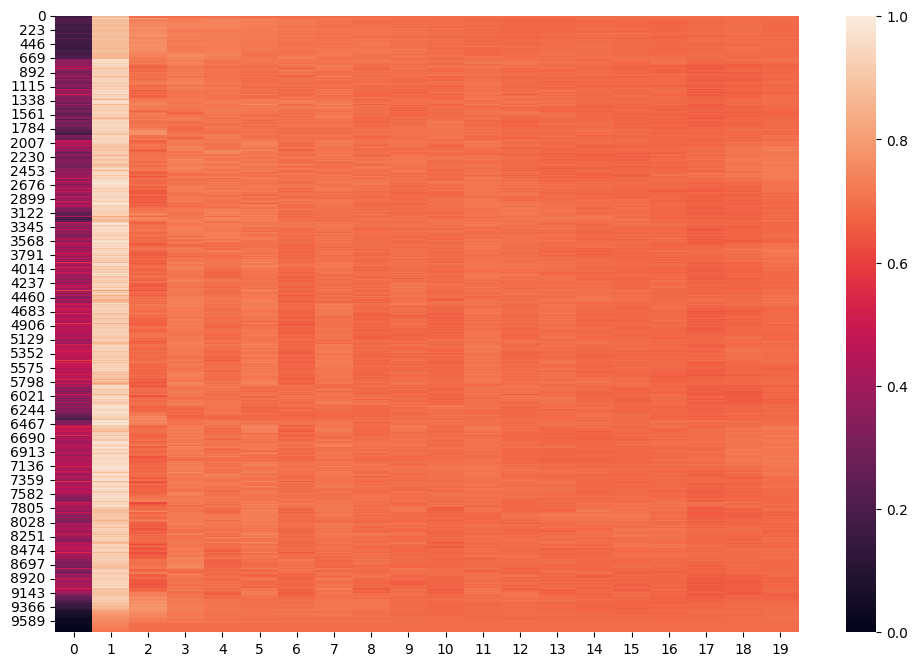

In [73]:
img_np_normalised = (img_np - img_np.min()) / (img_np.max() - img_np.min())
fig = plt.figure(figsize=(12, 8))
sns.heatmap(img_np_normalised)
plt.show()

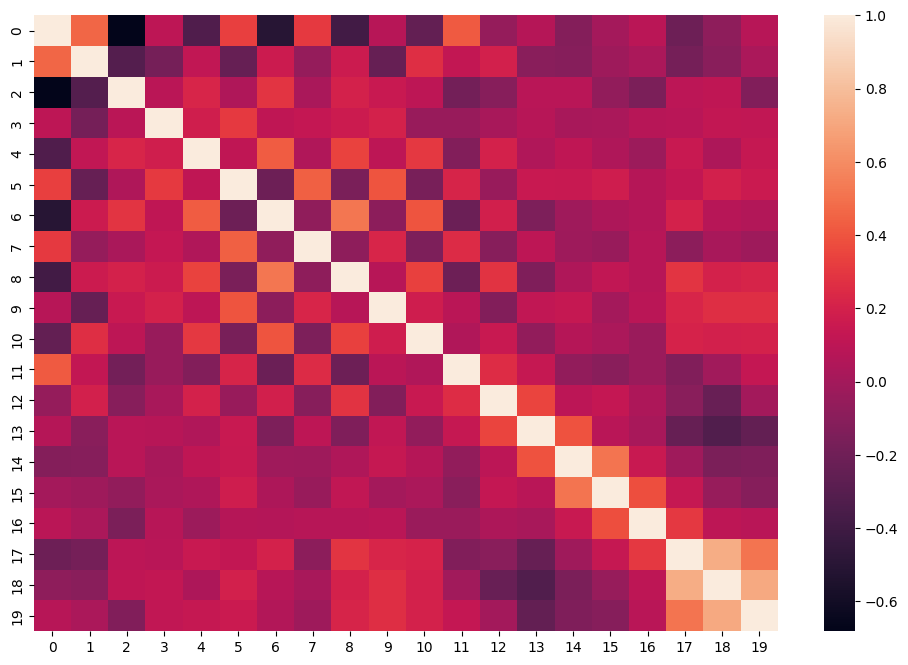

In [69]:
# Plot coorelation matrix
corr = df2.corr()
fig = plt.figure(figsize=(12, 8))
sns.heatmap(corr)
plt.show()

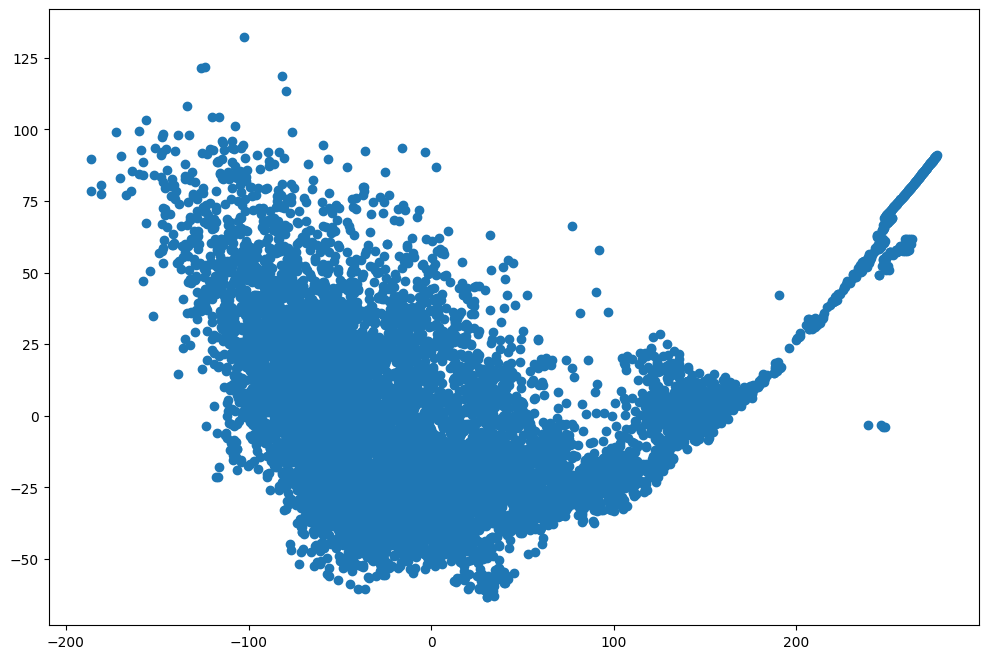

In [ ]:
# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df2)

fig = plt.figure(figsize=(12, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.show()



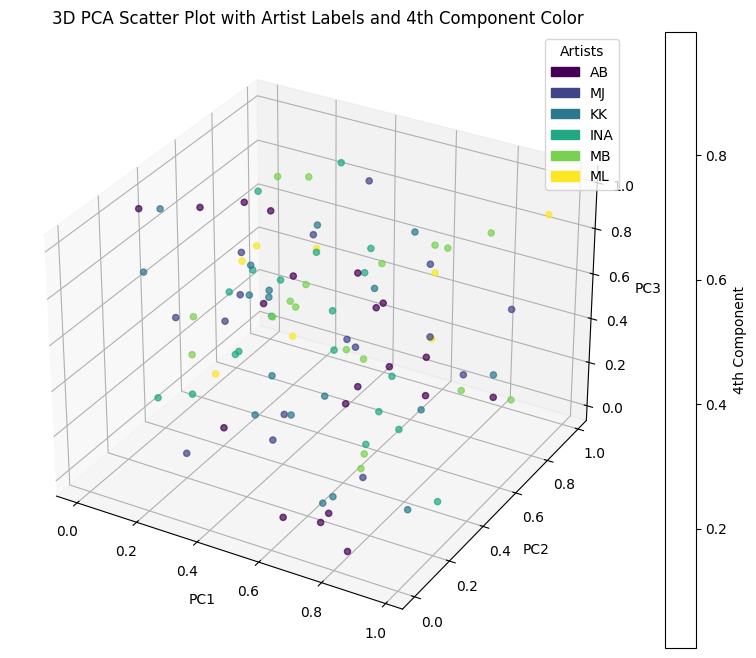

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

# Define artist short labels and colors
artist_short = ['AB', 'MJ', 'KK', 'INA', 'MB', 'ML']
unique_labels = np.arange(len(artist_short))
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

# Example PCA data (100 samples, 4 components, where the last component is for coloring)
X1_pca = np.random.rand(100, 4)  # 100 samples, 4 components
labels = np.random.choice(unique_labels, 100)  # Randomly assigning artist labels for demonstration

# Separate the components for plotting
x = X1_pca[:, 0]
y = X1_pca[:, 1]
z = X1_pca[:, 2]
color = X1_pca[:, 3]  # Use the 4th component as color

# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each artist category with a specific color
for idx, label in enumerate(unique_labels):
    idx_points = np.where(labels == label)
    ax.scatter(x[idx_points], y[idx_points], z[idx_points], c=[colors[idx]],
               label=artist_short[label], s=20, alpha=0.7)

# Add color bar for the 4th component
scatter = ax.scatter(x, y, z, c=color, cmap='viridis', alpha=0)  # Use an invisible scatter for color mapping
fig.colorbar(scatter, label="4th Component")

# Create a legend for artist labels
legend_handles = [mpatches.Patch(color=colors[i], label=artist_short[i]) for i in range(len(unique_labels))]
plt.legend(handles=legend_handles, title="Artists", loc="upper right")

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title("3D PCA Scatter Plot with Artist Labels and 4th Component Color")

plt.show()


In [59]:
df3 = df2.copy()

In [60]:
def standardization_column(n):
    mean = df2[n].mean()
    std = df2[n].std()
    df3[n] = (df2[n] - mean) / std

In [61]:
for i in range(0):
    standardization_column(i)

<function matplotlib.pyplot.show(close=None, block=None)>

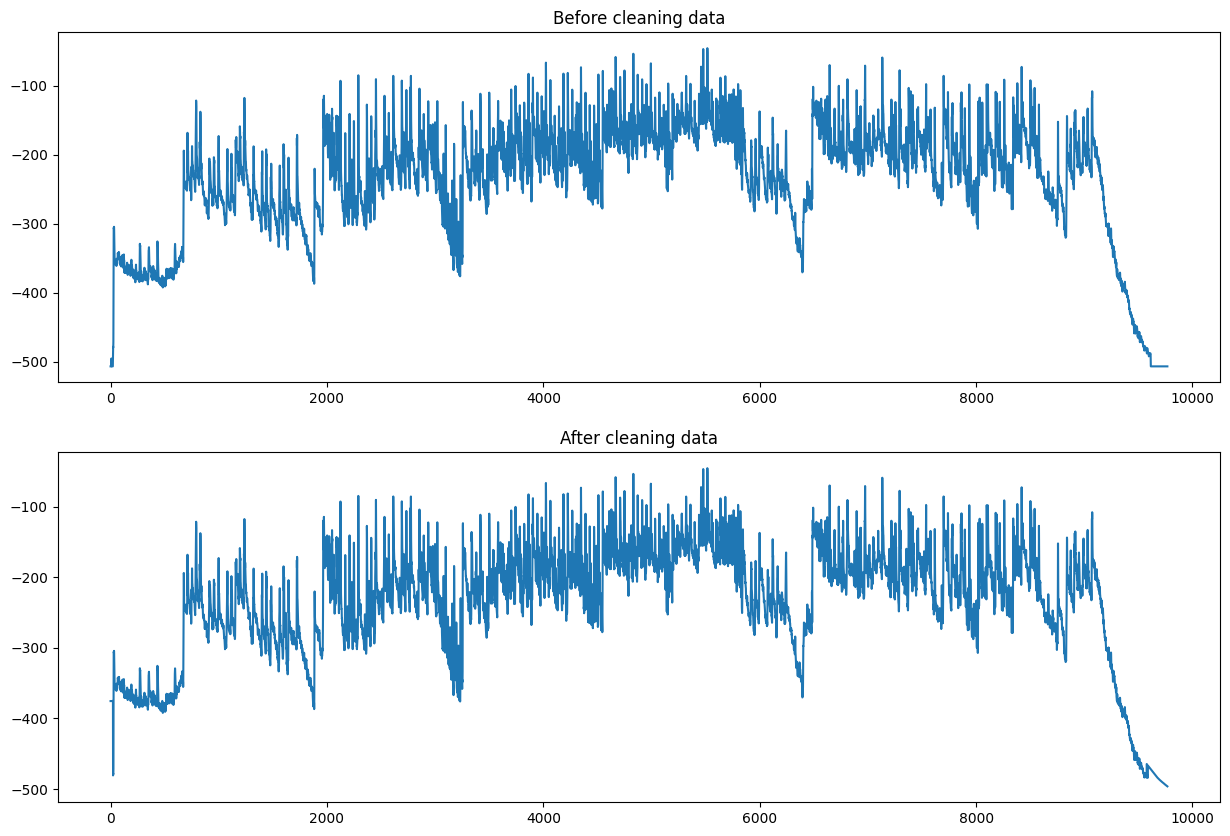

In [62]:
fig = plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(df[0])
plt.title('Before cleaning data')

plt.subplot(2, 1, 2)
plt.plot(df3[0])
plt.title('After cleaning data')
plt.show


In [63]:
df4 = df3.copy()
df4 = df4.transpose()
df4.head()

,0,1,2,3,4,5,6,7,8,9,...,9759,9760,9761,9762,9763,9764,9765,9766,9767,9768
0,-375.342256,-375.361888,-375.371466,-375.374497,-375.374762,-375.370438,-375.352885,-375.334161,-375.331987,-375.318425,...,-495.118512,-495.265581,-495.413536,-495.547224,-495.666021,-495.769405,-495.865231,-495.969223,-496.08496,-496.215513
1,119.884666,119.903488,119.928846,119.959825,119.989464,120.025779,120.072903,120.119230,120.160764,120.223850,...,14.726293,14.544104,14.362053,14.195625,14.045201,13.912964,13.788510,13.655975,13.50951,13.347622
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.085611,8.630039,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.187056,-1.611872,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.679612,-5.088893,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


In [64]:
# import statsmodels.api as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Ensure you remove any constant or duplicate columns from df4 first

# X = df4.copy()
# X = sm.add_constant(X)  

# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
# vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# # Remove the constant term from VIF results
# vif_data = vif_data[vif_data["feature"] != "const"]

# print("VIF Analysis Results:")
# print(vif_data)


In [65]:
df5 = df4.copy()
df5 = df5.transpose()
# data_transposed = pd.DataFrame(df5).T 
df5

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-375.342256,119.884666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-375.361888,119.903488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-375.371466,119.928846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-375.374497,119.959825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-375.374762,119.989464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,-495.769405,13.912964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9765,-495.865231,13.788510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9766,-495.969223,13.655975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9767,-496.084960,13.509510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
cov_matrix = df5.cov()
cov_matrix.to_csv(f"cov-matrix/{num:02d}-cov.csv")
print(cov_matrix)

             0            1            2           3           4           5   \
0   6474.343314  1205.701654 -1281.063647   96.098834 -328.705214  311.140223   
1   1205.701654  1068.008588  -236.249850  -69.226703   48.062138  -91.333958   
2  -1281.063647  -236.249850   545.728985   25.302616   64.317610   12.964730   
3     96.098834   -69.226703    25.302616  140.803125   26.948514   42.914365   
4   -328.705214    48.062138    64.317610   26.948514  153.278207   16.154722   
5    311.140223   -91.333958    12.964730   42.914365   16.154722  140.814193   
6   -476.387185    62.709034    78.017628   15.076858   61.536985  -29.849827   
7    220.146999   -15.328359     4.922079   13.619554    5.476122   45.530471   
8   -297.382326    49.339926    45.070562   18.041193   39.819676  -17.563425   
9     52.276948   -68.476903    30.731431   20.606257   10.804658   40.889866   
10  -177.253454    74.828674    21.632181   -4.326666   33.073115  -17.497893   
11   275.873553    33.312076

Original DataFrame Shape: (9769, 20)
Original DataFrame Head:
           0           1    2    3    4    5    6    7    8    9    10   11  \
0 -375.342256  119.884666  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1 -375.361888  119.903488  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2 -375.371466  119.928846  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3 -375.374497  119.959825  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4 -375.374762  119.989464  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    12   13   14   15   16   17   18   19  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Missing values before dropping: 0
Shapef of cleaned DataFrame after dropping NaNs: (9769, 20)
Mean before scaling:
0    -237.016750
1     159.772138
2       1.755189
3      17.452927
4       9.281756

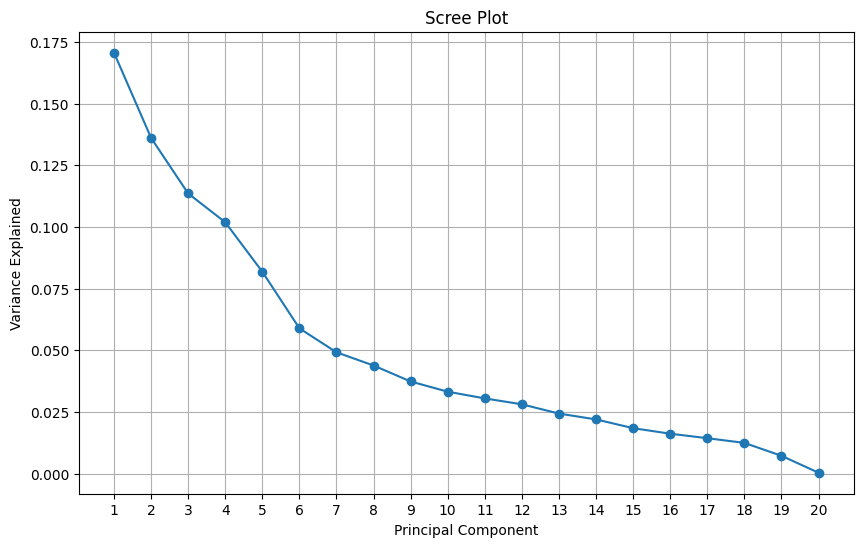

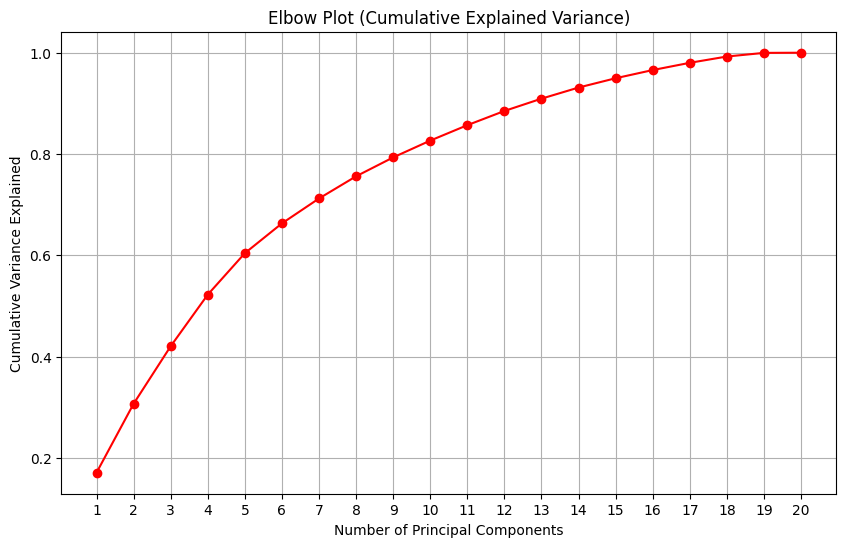

Number of components that explain 95% variance: 16
Shape of PCA DataFrame: (9769, 20)


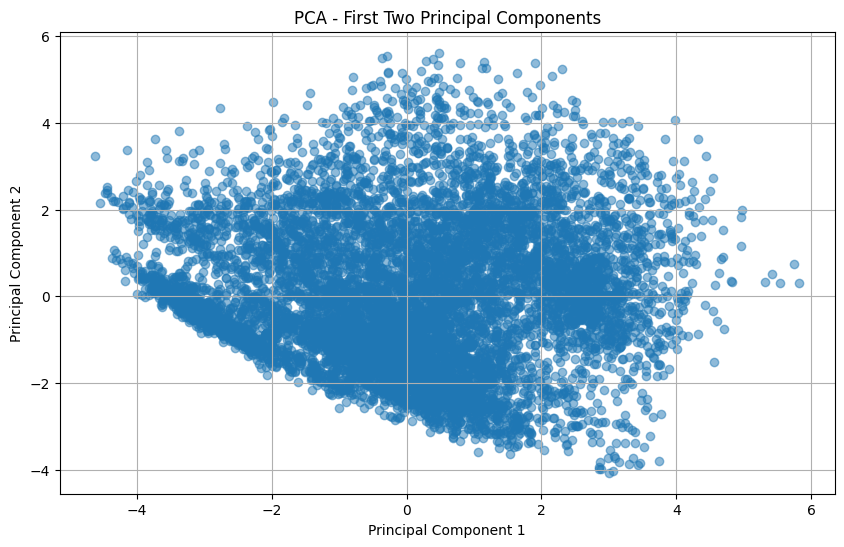

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df5 is already defined with your dataset
# Step 1: Check the initial DataFrame shape and content
print(f"Original DataFrame Shape: {df5.shape}")
print("Original DataFrame Head:")
print(df5.head())

# Step 2: Count missing values before dropping
missing_values = df5.isnull().sum().sum()
print("Missing values before dropping:", missing_values)

# Step 3: Remove rows with missing values
df5_cleaned = df5.dropna()
print(f"Shapef of cleaned DataFrame after dropping NaNs: {df5_cleaned.shape}")

# Step 4: Check mean and std before scaling
print("Mean before scaling:")
print(df5_cleaned.mean())
print("Std before scaling:")
print(df5_cleaned.std())

# Step 5: Standardize the data
scaler = StandardScaler()
df5_scaled = scaler.fit_transform(df5_cleaned)

# Step 6: Check mean and std after scaling
print("Mean after scaling:", np.mean(df5_scaled, axis=0))
print("Std after scaling:", np.std(df5_scaled, axis=0))

# Step 7: Perform PCA
pca = PCA()
pca.fit(df5_scaled)

# Step 8: Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
for i, var in enumerate(explained_variance):
    print(f"Principal Component {i + 1}: {var:.4f}")

# Step 9: Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

# Step 10: Elbow plot (cumulative explained variance)
cumulative_variance = explained_variance.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='red')
plt.title('Elbow Plot (Cumulative Explained Variance)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid()
plt.show()

# Step 11: Select number of components explaining 95% variance
n_components = next(i for i, cum_var in enumerate(cumulative_variance) if cum_var >= 0.95) + 1
print(f"Number of components that explain 95% variance: {n_components}")

# Step 12: Create a DataFrame for the principal components
pca_components = pca.transform(df5_scaled)
pca_df = pd.DataFrame(data=pca_components, columns=[f'PC{i + 1}' for i in range(pca_components.shape[1])])
print(f"Shape of PCA DataFrame: {pca_df.shape}")

# Step 13: 2D Scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


In [68]:
print("hi")

hi
